In [3]:
# 필요한 라이브러리 가져오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
cravens = pd.read_excel('cravens.xlsx')

In [5]:
cravens.head()

,Sales,Time,Poten,AdvExp,Share,Change,Accounts,Work,Rating
0,3669.88,43.10,74065.1,4582.9,2.51,0.34,74.86,15.05,4.9
1,3473.95,108.13,58117.3,5539.8,5.51,0.15,107.32,19.97,5.1
2,2295.10,13.82,21118.5,2950.4,10.91,-0.72,96.75,17.34,2.9
3,4675.56,186.18,68521.3,2243.1,8.27,0.17,195.12,13.40,3.4
4,6125.96,161.79,57805.1,7747.1,9.15,0.50,180.44,17.64,4.6


In [6]:
cravens.tail()

,Sales,Time,Poten,AdvExp,Share,Change,Accounts,Work,Rating
20,1741.45,10.57,23990.8,861.0,7.37,-1.63,75.61,20.99,1.6
21,2035.75,13.82,25694.9,3571.5,8.39,-0.43,102.44,21.66,3.4
22,1578.00,8.13,23736.3,2845.5,5.15,0.04,76.42,21.46,2.7
23,4167.44,58.44,34314.3,5060.1,12.88,0.22,136.58,24.78,2.8
24,2799.97,21.14,22809.5,3552.0,9.14,-0.74,88.62,24.96,3.9


In [7]:
cravens.shape #데이터 사이즈

(25, 9)

In [8]:
print('평균: ', cravens.Sales.mean())
print('표준편차: ', cravens.Sales.std())
print('분산: ', cravens.Sales.var())
print('최소값: ', cravens.Sales.min())
print('최대값: ', cravens.Sales.max())
print('중위수: ', cravens.Sales.median())
print('최빈수: ', cravens.Sales.mode())
print('변동계수: ', 
      (cravens.Sales.std()/cravens.Sales.mean())*100)
print('기움: ', cravens.Sales.skew())

평균:  3374.5676000000003
표준편차:  1313.06811398051
분산:  1724147.8719523333
최소값:  1578.0
최대값:  6519.45
중위수:  3264.2
최빈수:  0     1578.00
1     1741.45
2     2035.75
3     2134.94
4     2295.10
5     2337.38
6     2408.11
7     2468.27
8     2533.31
9     2729.24
10    2799.97
11    2800.78
12    3264.20
13    3289.40
14    3367.45
15    3453.62
16    3473.95
17    3669.88
18    4167.44
19    4586.95
20    4675.56
21    4876.37
22    5031.66
23    6125.96
24    6519.45
Name: Sales, dtype: float64
변동계수:  38.91070707786413
기움:  0.8933259670625636


In [9]:
(cravens.Sales.max() - cravens.Sales.min())/9
pd.cut(cravens.Sales,np.arange(1000,7000,500),
       include_lowest=True)

0     (3500.0, 4000.0]
1     (3000.0, 3500.0]
2     (2000.0, 2500.0]
3     (4500.0, 5000.0]
4     (6000.0, 6500.0]
5     (2000.0, 2500.0]
6     (5000.0, 5500.0]
7     (3000.0, 3500.0]
8                  NaN
9     (4500.0, 5000.0]
10    (2000.0, 2500.0]
11    (2500.0, 3000.0]
12    (2000.0, 2500.0]
13    (2000.0, 2500.0]
14    (4500.0, 5000.0]
15    (2500.0, 3000.0]
16    (3000.0, 3500.0]
17    (2500.0, 3000.0]
18    (3000.0, 3500.0]
19    (3000.0, 3500.0]
20    (1500.0, 2000.0]
21    (2000.0, 2500.0]
22    (1500.0, 2000.0]
23    (4000.0, 4500.0]
24    (2500.0, 3000.0]
Name: Sales, dtype: category
Categories (11, interval[float64, right]): [(999.999, 1500.0] < (1500.0, 2000.0] < (2000.0, 2500.0] < (2500.0, 3000.0] ... (4500.0, 5000.0] < (5000.0, 5500.0] < (5500.0, 6000.0] < (6000.0, 6500.0]]

In [10]:
tab = pd.cut(cravens.Sales,np.arange(1000,7000,500))
freq = tab.value_counts()
freq

Sales
(2000, 2500]    6
(3000, 3500]    5
(2500, 3000]    4
(4500, 5000]    3
(1500, 2000]    2
(3500, 4000]    1
(4000, 4500]    1
(5000, 5500]    1
(6000, 6500]    1
(1000, 1500]    0
(5500, 6000]    0
Name: count, dtype: int64

In [11]:
rel_freq = freq/freq.sum() #상대빈도
pct_freq = rel_freq*100
freq_tab = pd.concat([freq, rel_freq, pct_freq], axis=1)
freq_tab.columns = ['빈도', '상대빈도', '백분율빈도']
freq_tab

,빈도,상대빈도,백분율빈도
Sales,,,
"(2000, 2500]",6,0.250000,25.000000
"(3000, 3500]",5,0.208333,20.833333
"(2500, 3000]",4,0.166667,16.666667
"(4500, 5000]",3,0.125000,12.500000
"(1500, 2000]",2,0.083333,8.333333
"(3500, 4000]",1,0.041667,4.166667
"(4000, 4500]",1,0.041667,4.166667
"(5000, 5500]",1,0.041667,4.166667
"(6000, 6500]",1,0.041667,4.166667


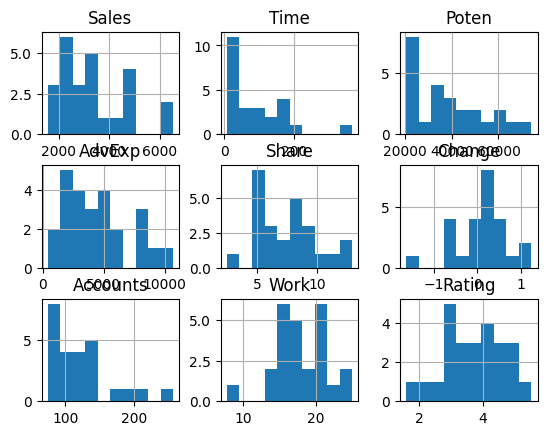

In [12]:
# 히스토그램
cravens.hist()
plt.show()

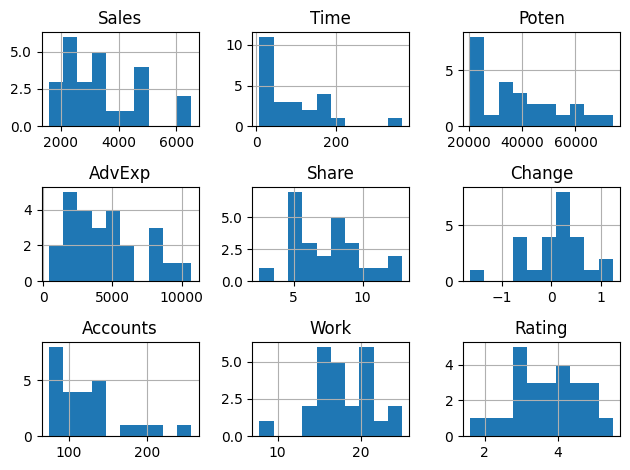

In [13]:
# 히스토그램
cravens.hist()
plt.tight_layout() #겹치지 않게
plt.show()

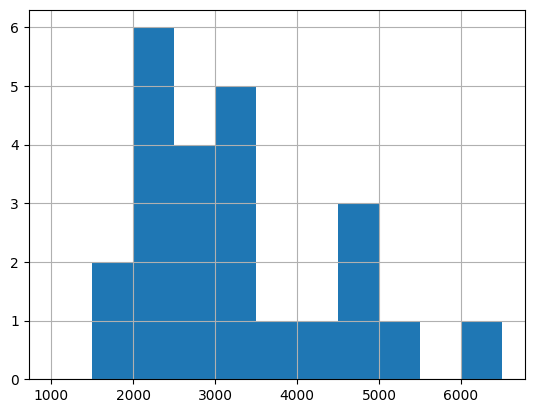

In [14]:
cravens.Sales.hist(bins=np.arange(1000,7000,500))
plt.show()

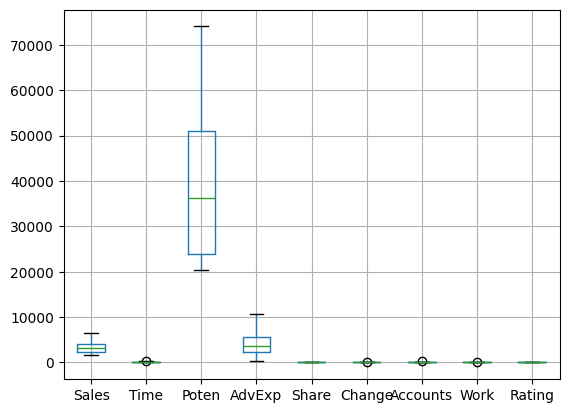

In [15]:
# 박스플랏 (데이터의 범위파악, 이상치 파악)
cravens.boxplot()
plt.show()

<Axes: >

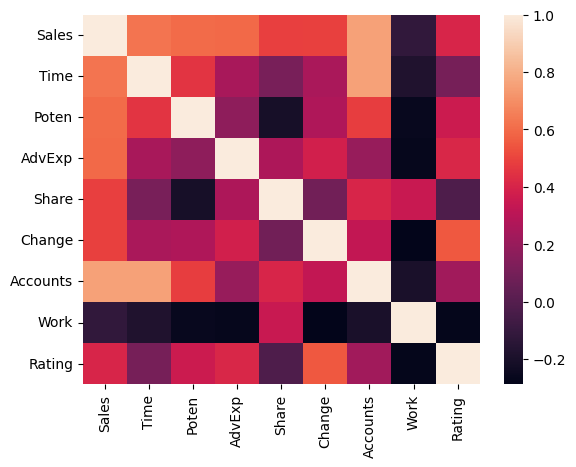

In [16]:
sns.heatmap(cravens.corr())

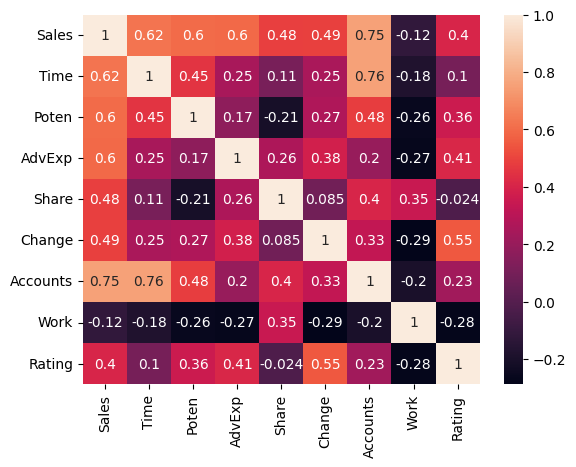

In [17]:
# 상관관계
sns.heatmap(cravens.corr(), annot=True)
plt.show()

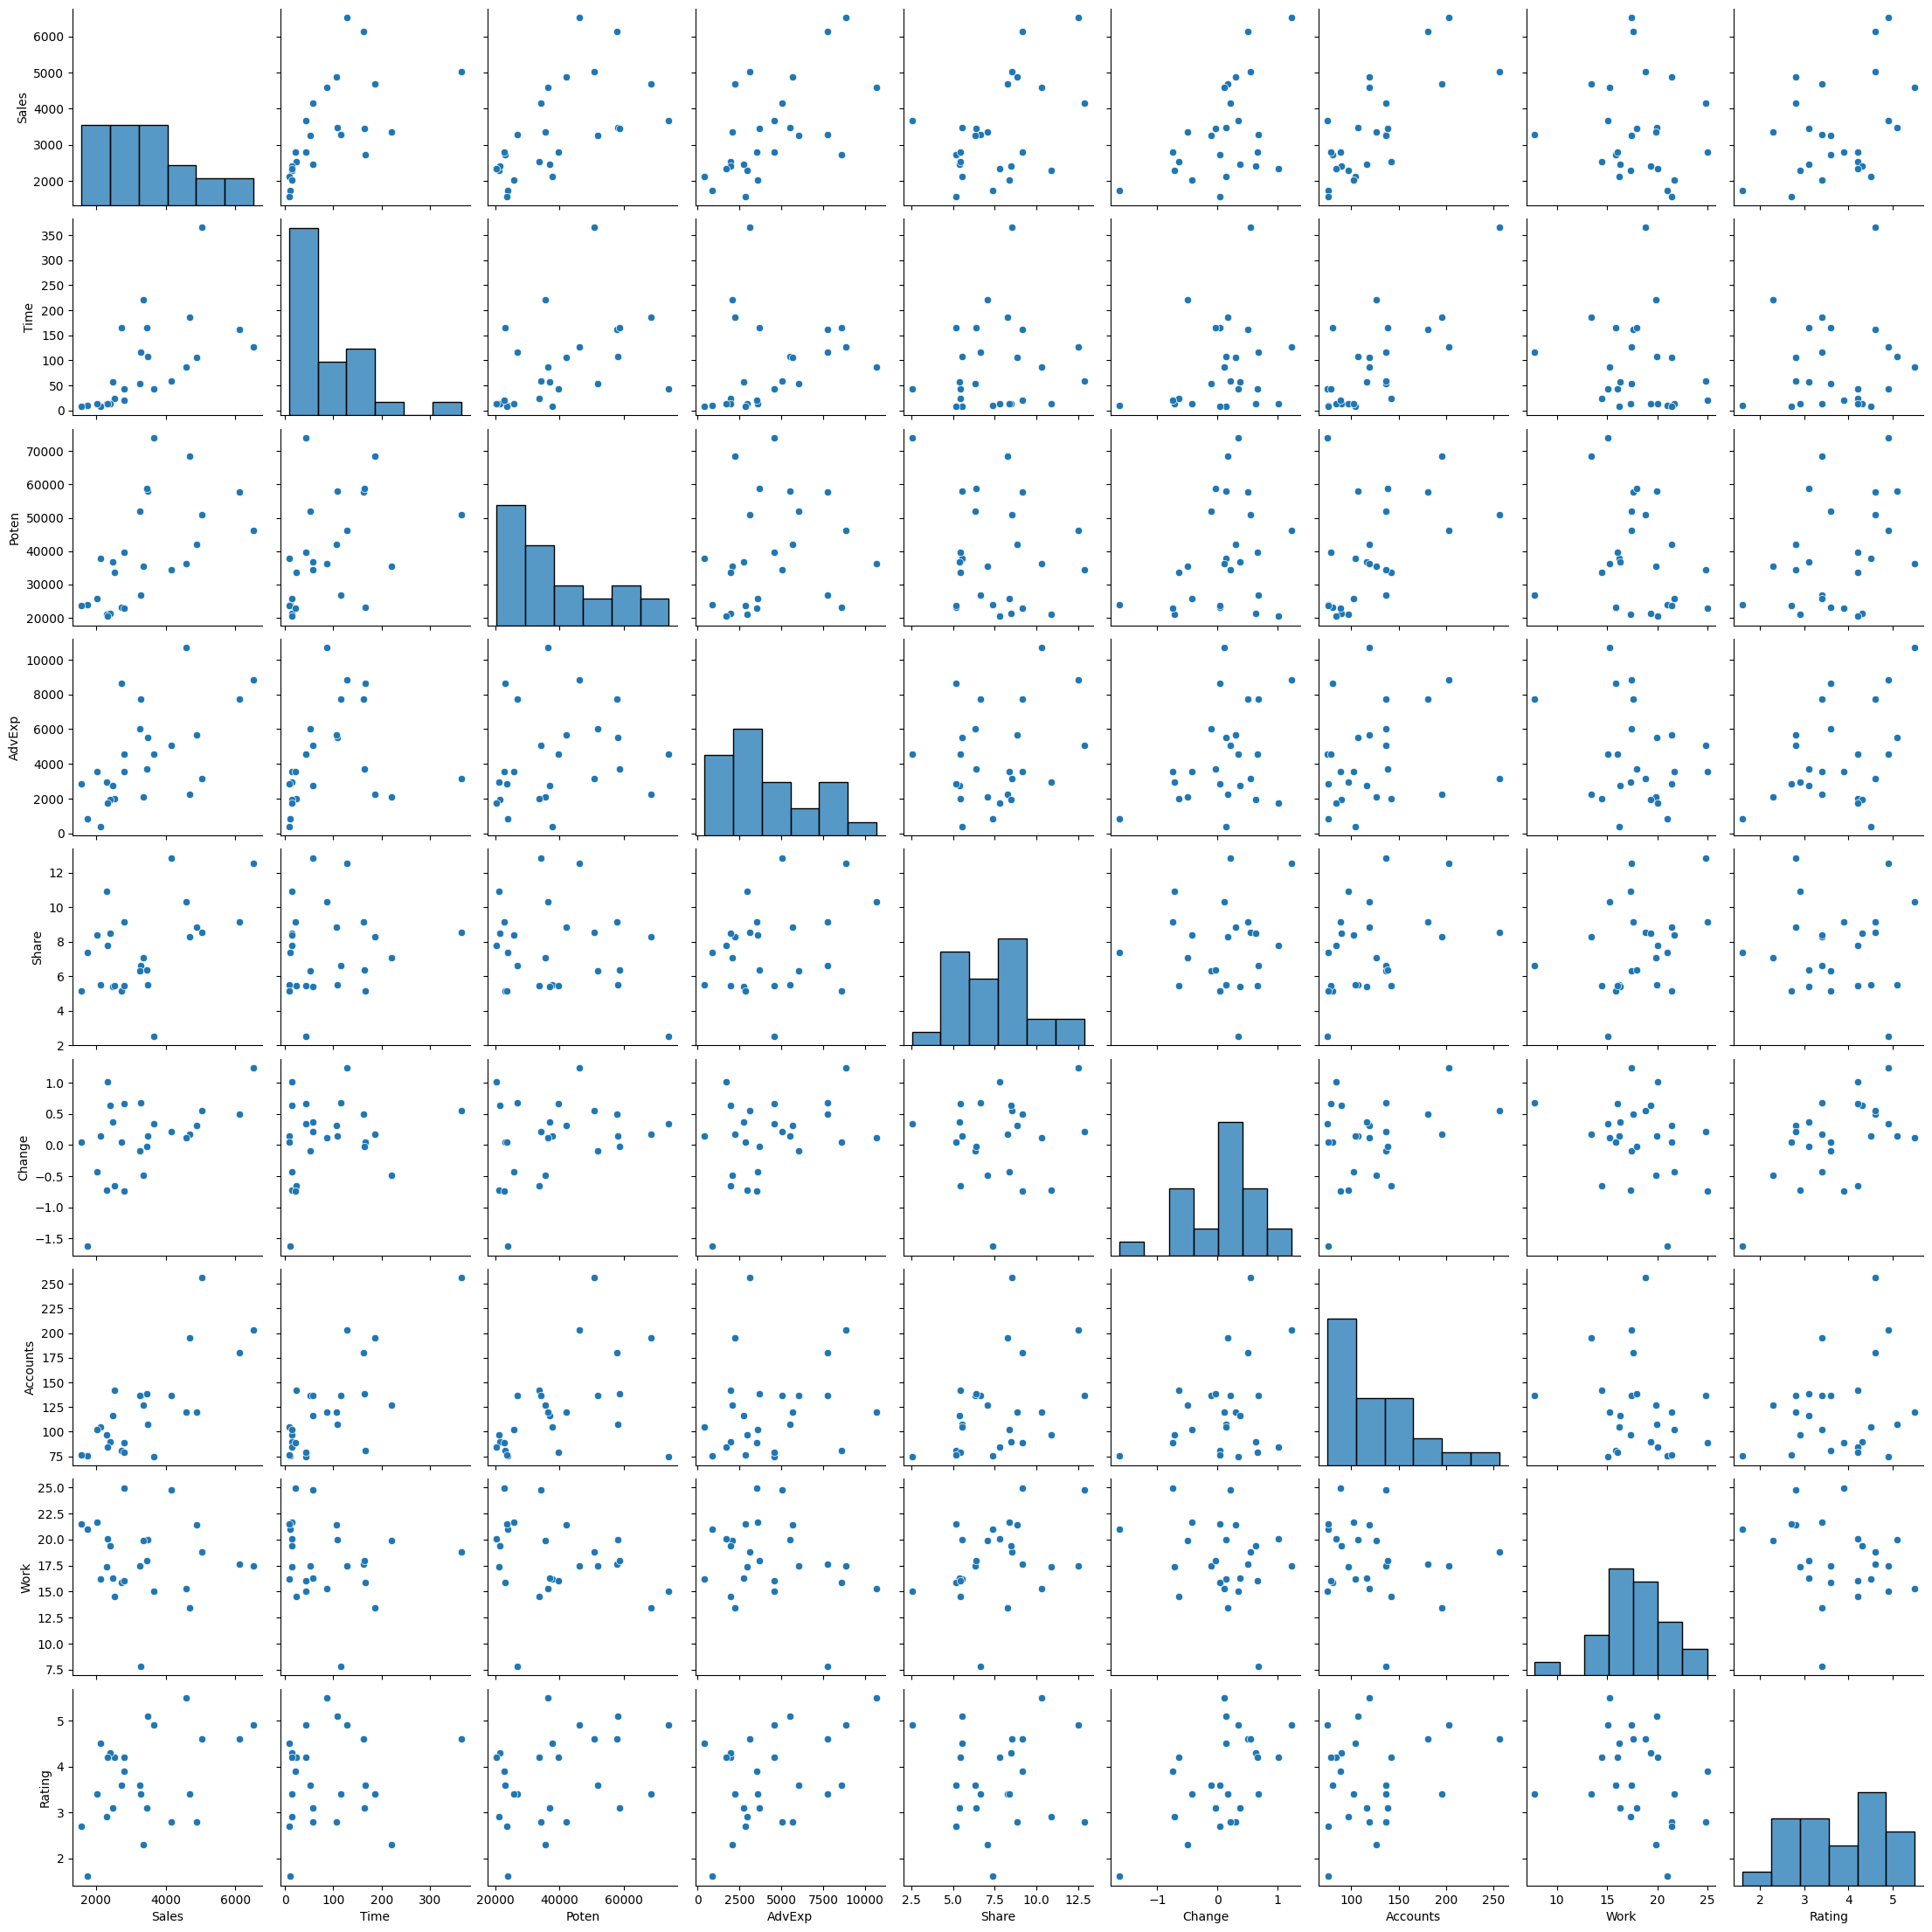

In [18]:
# 산점도
sns.pairplot(cravens)
plt.show()

In [19]:
import statsmodels.api as sm

In [20]:
# 첫번째 모델
y = cravens.Sales
x = cravens.drop('Sales', axis=1)

In [21]:
x = sm.add_constant(x)
model1 = sm.OLS(y,x).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     23.66
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           1.81e-07
Time:                        11:22:32   Log-Likelihood:                -182.57
No. Observations:                  25   AIC:                             383.1
Df Residuals:                      16   BIC:                             394.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1507.8358    778.608     -1.937      0.071   -3158.412     142.740
Time           2.0101      1.931      1.041      0.313      -2.082       6.103
Poten          0.0372      0.008      4.536      0.000       0.020       0.055
AdvExp         0.1510      0.047      3.205      0.006       0.051       0.251
Share        199.0402     67.029      2.969      0.009      56.945     341.136
Change       290.8666    186.777      1.557      0.139    -105.083     686.816
Accounts       5.5497      4.775      1.162      0.262      -4.574      15.673
Work          19.7939     33.675      0.588      0.565     -51.594      91.182
Rating         8.1890    128.498      0.064      0.950    -264.216     280.594
==============================================================================
Omnibus:                        0.950   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.622   Jarque-Bera (JB):                0.940
Skew:                           0.336   Prob(JB):                        0.625
Kurtosis:                       2.329   Cond. No.                     3.66e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
# 두번째 모델 (poten, advexp, share만 넣고 모델을 돌림)
y = cravens.Sales
x = cravens[['Poten', 'AdvExp', 'Share']]

In [23]:
x = sm.add_constant(x)
model2 = sm.OLS(y,x).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     39.35
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           8.43e-09
Time:                        11:22:50   Log-Likelihood:                -190.84
No. Observations:                  25   AIC:                             389.7
Df Residuals:                      21   BIC:                             394.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1603.5821    505.551     -3.172      0.005   -2654.933    -552.231
Poten          0.0543      0.007      7.263      0.000       0.039       0.070
AdvExp         0.1675      0.044      3.783      0.001       0.075       0.260
Share        282.7469     48.756      5.799      0.000     181.354     384.140
==============================================================================
Omnibus:                        1.862   Durbin-Watson:                   1.058
Prob(Omnibus):                  0.394   Jarque-Bera (JB):                1.063
Skew:                           0.069   Prob(JB):                        0.588
Kurtosis:                       1.999   Cond. No.                     1.95e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# 두번째 모델 (poten, advexp, share만 넣고 모델을 돌림)
y = cravens.Sales
x = cravens[['Poten', 'AdvExp', 'Share','Accounts']]

In [25]:
x = sm.add_constant(x)
model3 = sm.OLS(y,x).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     45.23
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           9.56e-10
Time:                        11:35:08   Log-Likelihood:                -185.63
No. Observations:                  25   AIC:                             381.3
Df Residuals:                      20   BIC:                             387.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1441.9323    423.582     -3.404      0.003   -2325.508    -558.356
Poten          0.0382      0.008      4.791      0.000       0.022       0.055
AdvExp         0.1750      0.037      4.741      0.000       0.098       0.252
Share        190.1442     49.744      3.822      0.001      86.380     293.909
Accounts       9.2139      2.865      3.216      0.004       3.237      15.191
==============================================================================
Omnibus:                        0.144   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.930   Jarque-Bera (JB):                0.179
Skew:                           0.146   Prob(JB):                        0.914
Kurtosis:                       2.705   Cond. No.                     1.97e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""